## Setup and Importing Libraries

In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from wordcloud import WordCloud
from collections import Counter
from tqdm import tqdm
import random

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\siva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\siva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
seed=42

## Loading the Data

In [4]:
data_path = '../data/Gutenberg_original/Gutenberg/txt/'
random.seed(seed)
txt_files = glob.glob(os.path.join(data_path, '*.txt'))
data = []

for file in tqdm(txt_files, desc="Loading text files"):
    try:
        file = os.path.normpath(file)  # Normalize path
        with open(file, 'r', encoding='utf-8', errors='ignore') as f:
            content = f.read()
        book_title = os.path.basename(file).replace('.txt', '').replace('_', ' ')
        data.append({'book_title': book_title, 'content': content})
    except FileNotFoundError:
        print(f"File not found: {file}")
    except Exception as e:
        print(f"Error reading file {file}: {e}")

df = pd.DataFrame(data)

df.head()

Loading text files:  13%|███████▊                                                  | 405/3022 [00:00<00:03, 764.25it/s]

File not found: ..\data\Gutenberg_original\Gutenberg\txt\Charles Darwin___On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life. (2nd edition).txt


Loading text files: 100%|█████████████████████████████████████████████████████████| 3022/3022 [00:04<00:00, 711.95it/s]


,book_title,content
0,Abraham Lincoln Lincoln Letters,\nLINCOLN LETTERS\n\nBy Abraham Lincoln\n\n\nP...
1,Abraham Lincoln Lincoln's First Inaugural Ad...,"\nLincoln's First Inaugural Address\nMarch 4, ..."
2,Abraham Lincoln Lincoln's Gettysburg Address...,"\n\nLincoln's Gettysburg Address, given Novemb..."
3,"Abraham Lincoln Lincoln's Inaugurals, Addres...",\nLongman's English Classics\n\nLINCOLN'S INAU...
4,Abraham Lincoln Lincoln's Second Inaugural A...,"\nLincoln's Second Inaugural Address\nMarch 4,..."


In [5]:
# ## 3a. Total Number of Books

num_books = df.shape[0]
print(f"Total Number of Books: {num_books}")


Total Number of Books: 3021


In [6]:
# ## 3b. List of Book Titles (First 10)

print("First 10 Books in the Dataset:")
print(df['book_title'].head(10).tolist())


First 10 Books in the Dataset:
['Abraham Lincoln   Lincoln Letters', "Abraham Lincoln   Lincoln's First Inaugural Address", "Abraham Lincoln   Lincoln's Gettysburg Address, given November 19, 1863", "Abraham Lincoln   Lincoln's Inaugurals, Addresses and Letters (Selections)", "Abraham Lincoln   Lincoln's Second Inaugural Address", 'Abraham Lincoln   Speeches and Letters of Abraham Lincoln, 1832-1865', 'Abraham Lincoln   State of the Union Addresses', 'Abraham Lincoln   The Emancipation Proclamation', 'Abraham Lincoln   The Life and Public Service of General Zachary Taylor  An Address', 'Abraham Lincoln   The Writings of Abraham Lincoln, Volume 1  1832-1843']


In [11]:
# ## 3c. Character Count and Approximate Word Count

# Function to compute character count
def compute_char_count(text):
    return len(text)

# Apply the function to the entire dataset using Pandas' apply with progress bar
df['char_count'] = df['content'].progress_apply(compute_char_count)

# Estimate word count (assuming average word length of 5 characters + 1 space)
df['approx_word_count'] = df['char_count'] // 6

# Display summary statistics
print("\nSummary Statistics:")
print(df[['char_count', 'approx_word_count']].describe())


100%|██████████████████████████████████████████████████████████████████████████| 3021/3021 [00:00<00:00, 445221.10it/s]


Summary Statistics:
         char_count  approx_word_count
count  3.021000e+03       3.021000e+03
mean   3.909737e+05       6.516187e+04
std    4.003257e+05       6.672095e+04
min    1.618000e+03       2.690000e+02
25%    1.226050e+05       2.043400e+04
50%    3.248800e+05       5.414600e+04
75%    5.387410e+05       8.979000e+04
max    1.202686e+07       2.004477e+06


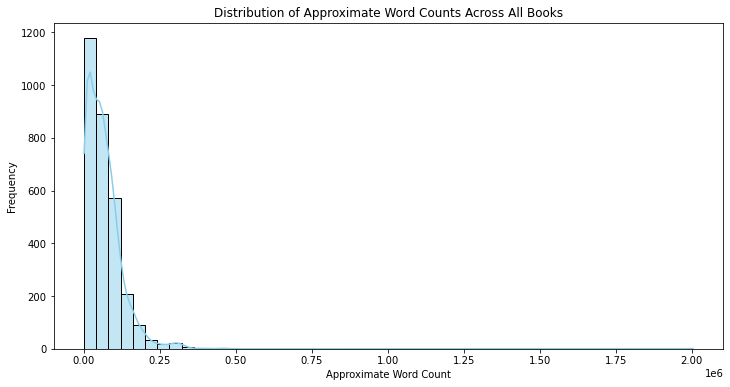

In [12]:
# ## 3d. Book Length Distribution

plt.figure(figsize=(12,6))
sns.histplot(df['approx_word_count'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Approximate Word Counts Across All Books')
plt.xlabel('Approximate Word Count')
plt.ylabel('Frequency')
plt.show()


In [13]:
# ## 4. Sampling for Detailed Analysis

# Define sample size
sample_size = 10

# Randomly sample books
sample_books = df.sample(n=sample_size, random_state=42)

# Reset index for convenience
sample_books = sample_books.reset_index(drop=True)

# Display sampled book titles
print("Sampled Books for Detailed Analysis:")
print(sample_books['book_title'].tolist())


Sampled Books for Detailed Analysis:
['James Matthew Barrie   Peter Pan', 'Edward Phillips Oppenheim   An Amiable Charlatan', 'Charles Dickens   A Message from the Sea', 'Beatrix Potter   The Tale of Samuel Whiskers', 'Andrew Lang   A Monk of Fife', 'Charles Kingsley   Women and Politics', "Harold Bindloss   Wyndham's Pal", 'Henry David Thoreau   Cape Cod', "William Wymark Jacobs   Bill's Lapse, Odd Craft, Part 4", 'Wilkie Collins   The Black Robe']


In [14]:
# ## 5a. Exact Word Count, Sentence Count, and Unique Words for Sampled Books

# Function to compute text metrics
def compute_text_metrics(text):
    words = text.split()
    sentences = sent_tokenize(text)
    unique_words = set(word_tokenize(text.lower()))
    return len(words), len(sentences), len(unique_words)

# Apply the function to the sampled dataset
metrics_sample = sample_books['content'].progress_apply(compute_text_metrics)

# Split the metrics into separate columns
sample_books[['word_count', 'sentence_count', 'unique_words']] = pd.DataFrame(metrics_sample.tolist(), index=sample_books.index)

# Display summary statistics for the sample
print("\nSummary Statistics for Sampled Books:")
print(sample_books[['word_count', 'sentence_count', 'unique_words']].describe())


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:09<00:00,  1.10it/s]


Summary Statistics for Sampled Books:
          word_count  sentence_count  unique_words
count      10.000000       10.000000     10.000000
mean    50748.200000     3125.500000   4591.600000
std     41972.549886     2820.036968   3002.694575
min      2679.000000      190.000000    769.000000
25%      8082.000000      382.250000   1820.750000
50%     54692.500000     3030.000000   5180.000000
75%     80376.750000     5090.250000   6995.500000
max    106637.000000     8049.000000   8975.000000


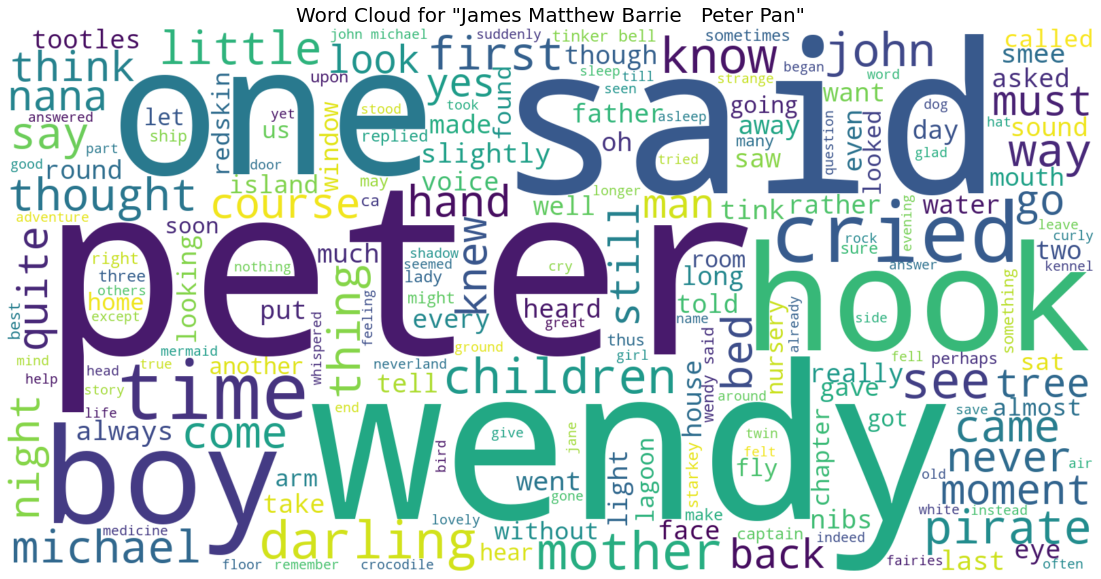

In [17]:
# ## 5b. Word Cloud for Sampled Book

for idx, row in sample_books[0:1].iterrows():
    book_title = row['book_title']
    text = row['content'].lower()
    
    # Tokenize and filter
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]
    
    # Generate word cloud
    wordcloud = WordCloud(width=1600, height=800, background_color='white', max_words=200).generate(' '.join(filtered_tokens))
    
    # Display the word cloud
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for "{book_title}"', fontsize=20)
    plt.show()


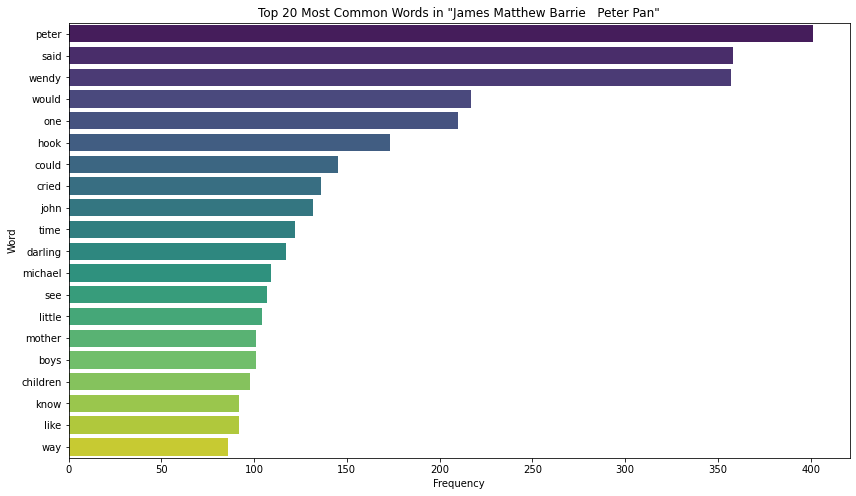

In [19]:
# ## 5c. Top 20 Most Common Words in Sampled Books

for idx, row in sample_books[0:1].iterrows():
    book_title = row['book_title']
    text = row['content'].lower()
    
    # Tokenize and filter
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]
    
    # Count word frequencies
    word_counts = Counter(filtered_tokens)
    top_20 = word_counts.most_common(20)
    top_20_df = pd.DataFrame(top_20, columns=['Word', 'Frequency'])
    
    # Plot
    plt.figure(figsize=(14,8))
    sns.barplot(x='Frequency', y='Word', data=top_20_df, palette='viridis')
    plt.title(f'Top 20 Most Common Words in "{book_title}"')
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.show()


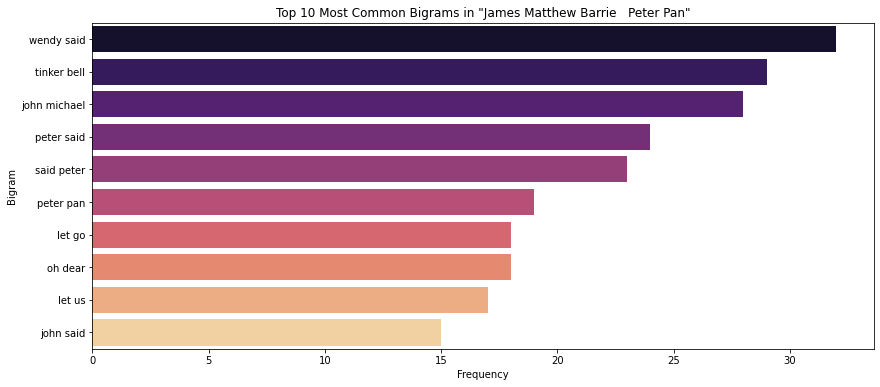

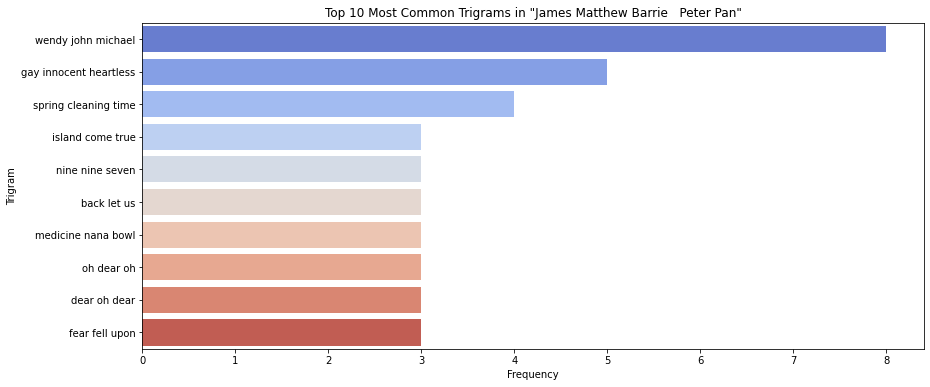

In [20]:
# ## 5d. Most Common Bigrams and Trigrams in Sampled Books

from nltk import ngrams

for idx, row in sample_books[0:1].iterrows():
    book_title = row['book_title']
    text = row['content'].lower()
    
    # Tokenize and filter
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]
    
    # Generate bigrams and trigrams
    bigrams = ngrams(filtered_tokens, 2)
    trigrams = ngrams(filtered_tokens, 3)
    
    # Count frequencies
    bigram_counts = Counter(bigrams)
    trigram_counts = Counter(trigrams)
    
    # Get top 10
    top_10_bigrams = bigram_counts.most_common(10)
    top_10_trigrams = trigram_counts.most_common(10)
    
    # Convert to DataFrame
    top_bigrams_df = pd.DataFrame(top_10_bigrams, columns=['Bigram', 'Frequency'])
    top_trigrams_df = pd.DataFrame(top_10_trigrams, columns=['Trigram', 'Frequency'])
    
    # Plot top 10 bigrams
    plt.figure(figsize=(14,6))
    sns.barplot(x='Frequency', y=top_bigrams_df['Bigram'].apply(lambda x: ' '.join(x)), data=top_bigrams_df, palette='magma')
    plt.title(f'Top 10 Most Common Bigrams in "{book_title}"')
    plt.xlabel('Frequency')
    plt.ylabel('Bigram')
    plt.show()
    
    # Plot top 10 trigrams
    plt.figure(figsize=(14,6))
    sns.barplot(x='Frequency', y=top_trigrams_df['Trigram'].apply(lambda x: ' '.join(x)), data=top_trigrams_df, palette='coolwarm')
    plt.title(f'Top 10 Most Common Trigrams in "{book_title}"')
    plt.xlabel('Frequency')
    plt.ylabel('Trigram')
    plt.show()


In [21]:
# ## 5e. Vocabulary Size and Lexical Diversity for Sampled Books

for idx, row in sample_books[0:1].iterrows():
    book_title = row['book_title']
    text = row['content']
    
    # Tokenize and filter
    tokens = word_tokenize(text.lower())
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]
    
    vocab_size = len(set(filtered_tokens))
    total_words = len(filtered_tokens)
    ttr = vocab_size / total_words if total_words > 0 else 0
    
    print(f"Book: {book_title}")
    print(f"  - Total Words: {total_words}")
    print(f"  - Unique Words: {vocab_size}")
    print(f"  - Type-Token Ratio (TTR): {ttr:.2f}")
    print()


Book: James Matthew Barrie   Peter Pan
  - Total Words: 21515
  - Unique Words: 4637
  - Type-Token Ratio (TTR): 0.22



In [23]:
# ## 5f. Readability Scores for Sampled Books (Optional)

from textblob import TextBlob


for idx, row in sample_books.iterrows():
    book_title = row['book_title']
    text = row['content']
    
    # Perform sentiment analysis
    blob = TextBlob(text)
    sentiment = blob.sentiment
    
    # Compute readability scores
    try:
        from textstat import flesch_reading_ease, flesch_kincaid_grade
    except ImportError:
        !pip install textstat
        from textstat import flesch_reading_ease, flesch_kincaid_grade
    
    reading_ease = flesch_reading_ease(text)
    grade_level = flesch_kincaid_grade(text)
    
    print(f"Book: {book_title}")
    print(f"  - Polarity: {sentiment.polarity}")
    print(f"  - Subjectivity: {sentiment.subjectivity}")
    print(f"  - Flesch Reading Ease: {reading_ease:.2f}")
    print(f"  - Flesch-Kincaid Grade Level: {grade_level:.2f}")
    print()



[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 105.1/105.1 kB 3.1 MB/s eta 0:00:00
   ---------------------------------------- 2.1/2.1 MB 22.2 MB/s eta 0:00:00
Book: James Matthew Barrie   Peter Pan
  - Polarity: 0.09071692337893916
  - Subjectivity: 0.5243632052121818
  - Flesch Reading Ease: 89.58
  - Flesch-Kincaid Grade Level: 4.60

Book: Edward Phillips Oppenheim   An Amiable Charlatan
  - Polarity: 0.08671701409705718
  - Subjectivity: 0.4875525569073455
  - Flesch Reading Ease: 84.98
  - Flesch-Kincaid Grade Level: 4.30

Book: Charles Dickens   A Message from the Sea
  - Polarity: 0.1340257007013868
  - Subjectivity: 0.49842449993981053
  - Flesch Reading Ease: 77.16
  - Flesch-Kincaid Grade Level: 7.30

Book: Beatrix Potter   The Tale of Samuel Whiskers
  - Polarity: 0.02135521235521236
  - Subjectivity: 0.4741990561990562
  - Flesch Reading Ease: 82.54
  - Flesch-Kincaid Grade Level: 5.20

Book: Andrew Lang   A Monk of Fife
  - Polarity: 0.12477398352997729
  - Subjectivity: 0.47

In [24]:
# ## 6. Summary and Insights

# Aggregate Analysis Summary
print("### Aggregate Analysis Summary:")
print(f"- **Total Number of Books:** {num_books}")
print(f"- **Average Character Count per Book:** {df['char_count'].mean():,.2f}")
print(f"- **Average Approximate Word Count per Book:** {df['approx_word_count'].mean():,.2f}")

# Detailed Analysis Summary for Sampled Books
print("\n### Detailed Analysis Summary for Sampled Books:")
print(f"- **Average Word Count:** {sample_books['word_count'].mean():,.2f}")
print(f"- **Average Sentence Count:** {sample_books['sentence_count'].mean():,.2f}")
print(f"- **Average Unique Words:** {sample_books['unique_words'].mean():,.2f}")

print("\n### Key Insights:")
print("- The dataset encompasses a wide range of book lengths, contributing to diverse vocabulary sizes.")
print("- Approximate word counts provide a quick estimate of book lengths without intensive computations.")
print("- Sampling allows for detailed exploration of specific books, revealing patterns and characteristics that are not immediately apparent in aggregate analyses.")
print("- Vocabulary diversity and readability scores vary across sampled books, indicating differing levels of complexity and stylistic approaches.")
print("- Common words, bigrams, and trigrams in sampled books highlight recurring themes and linguistic patterns.")


### Aggregate Analysis Summary:
- **Total Number of Books:** 3021
- **Average Character Count per Book:** 390,973.73
- **Average Approximate Word Count per Book:** 65,161.87

### Detailed Analysis Summary for Sampled Books:
- **Average Word Count:** 50,748.20
- **Average Sentence Count:** 3,125.50
- **Average Unique Words:** 4,591.60

### Key Insights:
- The dataset encompasses a wide range of book lengths, contributing to diverse vocabulary sizes.
- Approximate word counts provide a quick estimate of book lengths without intensive computations.
- Sampling allows for detailed exploration of specific books, revealing patterns and characteristics that are not immediately apparent in aggregate analyses.
- Vocabulary diversity and readability scores vary across sampled books, indicating differing levels of complexity and stylistic approaches.
- Common words, bigrams, and trigrams in sampled books highlight recurring themes and linguistic patterns.
